In [37]:
import numpy as np
import os
from numpy import expand_dims
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from PIL import Image, ImageDraw

In [38]:
class FaceDataLoader:
  def __init__(self, input_file):
    self.input_file = input_file
  
  def __len__(self):
    return len(self.input_file)
  
  def __getitem__(self, idx):
    img = load_img(self.input_file)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=100.0,
      height_shift_range=100.0,
      brightness_range=None,
      fill_mode='nearest',
      horizontal_flip=True,
      vertical_flip=False, ## Change this value to enable random vertical flips
      rescale=0.35
    )
    it = datagen.flow(samples, batch_size=1)
    for i in range(9):
      pyplot.subplot(330 + 1 + i)
      batch = it.next()
      image = batch[0].astype('uint8')
      pyplot.imshow(image) ## optional -> showing the images
      im = Image.fromarray(image)
      im.save(f"./Output/augmented_{i}.png")
    pyplot.show()
    return image
  
  def save_image_with_keypoints(input_file, keypoint_file, output_dir):
    img = Image.open(input_file)
    with open(keypoint_file) as f:
        keypoints = np.array(f.read().split(), dtype=np.float32)
    keypoints = keypoints.reshape((-1, 2))
    draw = ImageDraw.Draw(img)
    for x, y in keypoints:
        draw.ellipse((x-2, y-2, x+2, y+2), fill=(255, 0, 0, 255))
    filename = os.path.basename(input_file)
    output_file = os.path.join(output_dir, filename)
    img.save(output_file)

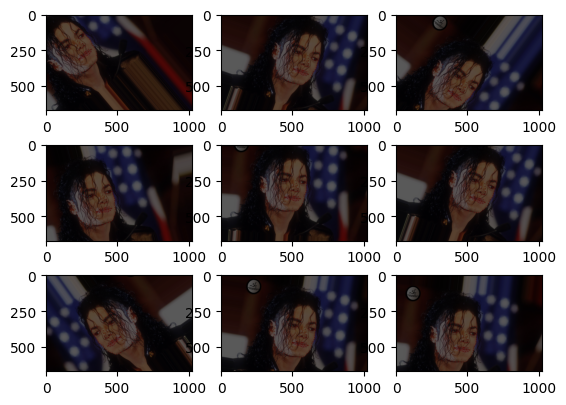

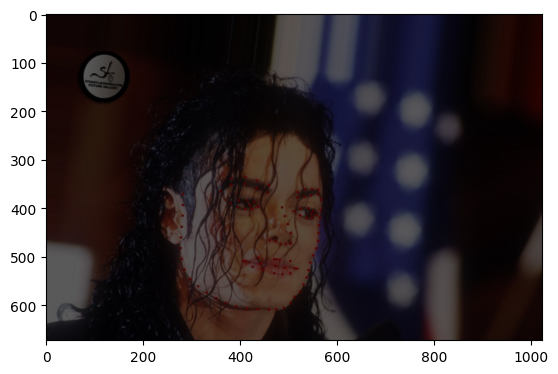

In [39]:
input_file = "./9_Press_Conference_Press_Conference_9_281.jpg"
FaceDataLoader.save_image_with_keypoints(input_file, "keypoints.txt", "./Output/")
input_file = "./Output/" + input_file
face_loader = FaceDataLoader(input_file=input_file)

image_data = face_loader[0]

pyplot.imshow(Image.fromarray(image_data))
pyplot.show()